In [1]:
# Importing the necesary libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,f1_score
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder


from sklearn.cluster import KMeans
from sklearn import svm

In [2]:
# 1. Read the dataset and understand the features and target variable.

df_Bank_original = pd.read_csv('Qualitative_Bankruptcy.data.txt',
                      names = ["Industrial Risk","Management Risk","Financial Flexibility","Credibility","Competitiveness","Operating Risk","Class"])


In [3]:
# Creating the copy of the dataframe for amnipulation.
df_Bank = df_Bank_original.copy()

In [4]:

df_Bank.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [5]:
# Attribute Information: (P=Positive, A-Average, N-negative, B-Bankruptcy, NB-Non-Bankruptcy)

# 1. Industrial Risk: {P,A,N}
# 2. Management Risk: {P,A,N}
# 3. Financial Flexibility: {P,A,N}
# 4. Credibility: {P,A,N}
# 5. Competitiveness: {P,A,N}
# 6. Operating Risk: {P,A,N}
# 7. Class: {B,NB}

In [6]:
df_Bank.shape

(250, 7)

In [7]:
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    object
 1   Management Risk        250 non-null    object
 2   Financial Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [9]:
# All the attributes are of object type which we might need to convert.
# No missing value is present in the dataset though it is also given the provided information.

In [10]:
#descriptive statistics
df_Bank.describe().T

,count,unique,top,freq
Industrial Risk,250,3,N,89
Management Risk,250,3,N,119
Financial Flexibility,250,3,N,119
Credibility,250,3,N,94
Competitiveness,250,3,N,103
Operating Risk,250,3,N,114
Class,250,2,NB,143


In [11]:
df_Bank.isnull().any()

Industrial Risk          False
Management Risk          False
Financial Flexibility    False
Credibility              False
Competitiveness          False
Operating Risk           False
Class                    False
dtype: bool

In [12]:
# No missing value is present in the dataset 

In [13]:
# Analyzing target column

In [14]:
df_Bank['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

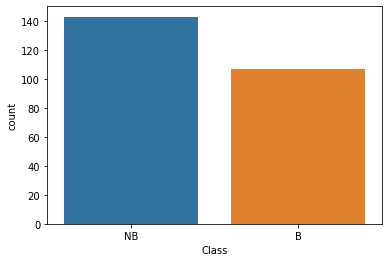

In [15]:
sns.countplot(df_Bank['Class'])

In [16]:
# Class B is little underrepresentation in the dataset
# Analysing features
# Spliting the independent features seperately for analysis. Not including the class column.

In [17]:
X = df_Bank.iloc[:,0:6]

In [18]:
X.head(5)

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk
0,P,P,A,A,A,P
1,N,N,A,A,A,N
2,A,A,A,A,A,A
3,P,P,P,P,P,P
4,N,N,P,P,P,N


In [19]:
X.apply(pd.Series.value_counts).T

,A,N,P
Industrial Risk,81,89,80
Management Risk,69,119,62
Financial Flexibility,74,119,57
Credibility,77,94,79
Competitiveness,56,103,91
Operating Risk,57,114,79


In [20]:
# Lets plot the countplot for all the attributes wrt Class for visually analyzing the independent features.

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


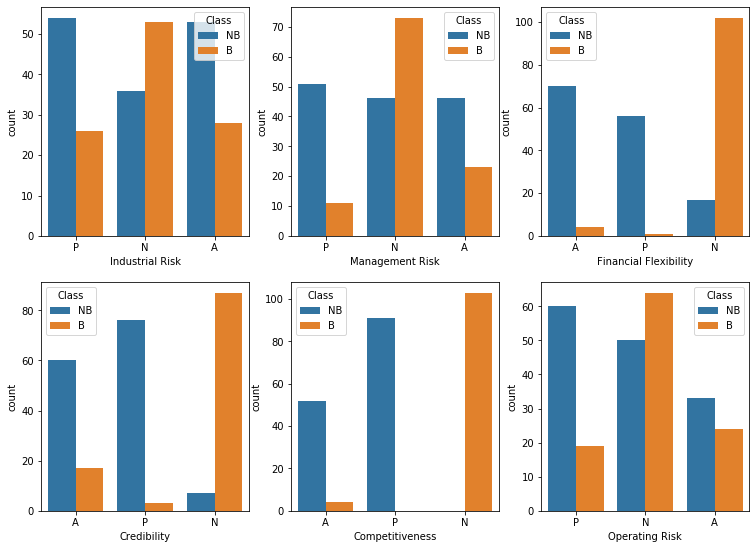

In [21]:

#sns.set(rc={'figure.figsize':(11.7,8.27)})
fig, ax =plt.subplots(2,3)
fig.set_size_inches(12.7, 9.27)
sns.countplot(df_Bank['Industrial Risk'],hue= df_Bank['Class'], ax=ax[0][0])
sns.countplot(df_Bank["Management Risk"],hue= df_Bank['Class'], ax=ax[0][1])
sns.countplot(df_Bank["Financial Flexibility"],hue= df_Bank['Class'], ax=ax[0][2])
sns.countplot(df_Bank["Credibility"],hue= df_Bank['Class'], ax=ax[1][0])
sns.countplot(df_Bank["Competitiveness"],hue= df_Bank['Class'], ax=ax[1][1])
sns.countplot(df_Bank["Operating Risk"],hue= df_Bank['Class'], ax=ax[1][2])
#sns.countplot(df_Bank["Class"], ax=ax[1][2])
fig.show()

In [22]:
# It is observed that Bankruptcy is very high for the negative value on all the attributes and least for the positive values.

In [23]:
# 2. Encode independent features. 

# Using One hot coding.

In [24]:
X = OneHotEncoder().fit_transform(X).toarray()

In [25]:
# Converting array into DataFrame.

In [26]:
X_encoded = pd.DataFrame(X)

In [27]:
X_encoded.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       250 non-null    float64
 1   1       250 non-null    float64
 2   2       250 non-null    float64
 3   3       250 non-null    float64
 4   4       250 non-null    float64
 5   5       250 non-null    float64
 6   6       250 non-null    float64
 7   7       250 non-null    float64
 8   8       250 non-null    float64
 9   9       250 non-null    float64
 10  10      250 non-null    float64
 11  11      250 non-null    float64
 12  12      250 non-null    float64
 13  13      250 non-null    float64
 14  14      250 non-null    float64
 15  15      250 non-null    float64
 16  16      250 non-null    float64
 17  17      250 non-null    float64
dtypes: float64(18)
memory usage: 35.3 KB


In [29]:
# After One Hot Coding, the datatypes of the independent features now are all converted into numerical.

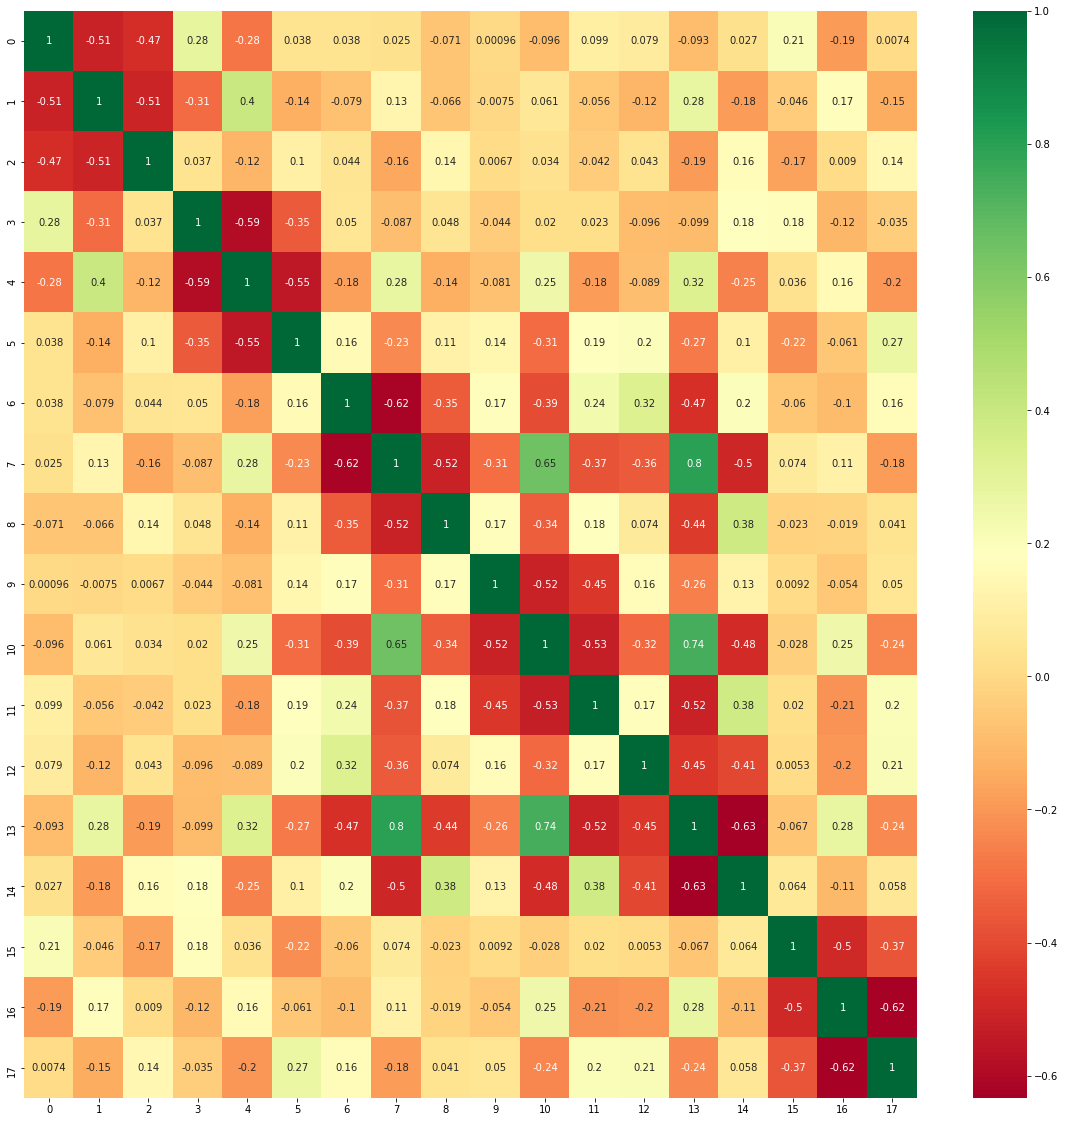

In [30]:
# Showing Correlation
x = X_encoded.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [31]:
# 3. Separate the dependent variable from the rest of the train data 

# In the previous questions we have alreaady sepaarated the independent variable from the dependent variable.

# Lets now create "Y" which is the "Class" column.

In [32]:
#X = df_Bank.iloc[:,0:6]
y= df_Bank.iloc[:,6]
y.head(2)

0    NB
1    NB
Name: Class, dtype: object

In [34]:

y.shape


(250,)

In [35]:
X_encoded.shape

(250, 18)

In [36]:
# 4. Split the dataset into training and test data (Take 80:20 ratio).

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size = .20,random_state = 2)

In [38]:
X_train.shape

(200, 18)

In [39]:
y_train.shape

(200,)

In [40]:

X_test.shape

(50, 18)

In [41]:
y_test.shape

(50,)

In [42]:
# 5. Apply PCA on the independent features of train data. 

In [43]:
# Standardizing of the independent features of the X_train.
sc = StandardScaler()
X_train_Sc =  sc.fit_transform(X_train)

In [44]:
# Print after computing the covariance matrix.
cov_matrix = np.cov(X_train_Sc.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00502513e+00 -5.11733746e-01 -4.83900986e-01  2.56218296e-01
  -2.47411457e-01  3.50566107e-02 -1.17061400e-02  7.45991161e-02
  -7.76937830e-02 -4.86764306e-02 -3.12924924e-02  8.14164038e-02
   6.99291870e-02 -2.89589786e-02 -3.04719616e-02  1.44865243e-01
  -1.48534265e-01  2.73809745e-02]
 [-5.11733746e-01  1.00502513e+00 -5.11733746e-01 -3.52992969e-01
   4.22664834e-01 -1.38866579e-01 -9.19616102e-02  1.27537269e-01
  -5.25721848e-02  5.62344776e-03  1.75592100e-02 -2.38146915e-02
  -1.11905197e-01  2.50032322e-01 -1.57775145e-01  1.36664043e-02
   1.43743872e-01 -1.68190414e-01]
 [-4.83900986e-01 -5.11733746e-01  1.00502513e+00  1.03252149e-01
  -1.83009342e-01  1.06358192e-01  1.05355260e-01 -2.04476714e-01
   1.31230676e-01  4.29497917e-02  1.34110682e-02 -5.71647090e-02
   4.40294881e-02 -2.25661475e-01  1.91142305e-01 -1.58782428e-01
   2.15267051e-03  1.43895760e-01]
 [ 2.56218296e-01 -3.52992969e-01  1.03252149e-01  1.00502513e+00
  -5.33043595e-01

In [45]:
# Calculating the Eigenvectors and Eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-3.51175358e-02 -4.72596106e-01 -3.19412828e-02  1.06833909e-01
  -1.31655850e-01 -6.48437095e-02 -3.22612718e-01  2.44901748e-01
  -1.49101658e-01 -2.12535456e-02  4.59720094e-01  1.18736149e-01
  -8.53245013e-03  2.58607894e-02  3.33740045e-02 -5.52787504e-01
  -6.14864121e-03  1.48203717e-01]
 [ 1.59467772e-01  4.35756645e-01  1.28877060e-01  7.74823523e-02
  -2.44231097e-01 -2.47015697e-01  4.99984940e-01 -5.42997828e-02
   1.96449875e-01  4.82946445e-02  4.64889621e-02  6.26483025e-02
  -8.68902191e-03  2.63353389e-02  3.39864227e-02 -5.62931241e-01
  -6.26146972e-03  1.50923278e-01]
 [-1.27276495e-01  2.88432592e-02 -9.93006916e-02 -1.85738074e-01
   3.80368625e-01  3.16392183e-01 -1.86547023e-01 -1.89605555e-01
  -5.09531026e-02 -2.79273131e-02 -5.07062136e-01 -1.82534058e-01
  -8.53245013e-03  2.58607894e-02  3.33740045e-02 -5.52787504e-01
  -6.14864121e-03  1.48203717e-01]
 [-7.63942544e-02 -4.51037863e-01  2.03637234e-02 -1.55429624e-01
   2.68990986e-01 -

In [46]:
# Computing the Principal Components.
#  Sort eigenvalues in descending order
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs ,'\n')

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(4.600672420252881, array([-0.03511754,  0.15946777, -0.12727649, -0.07639425,  0.25713771,
       -0.21346636, -0.25779479,  0.39699862, -0.19539724, -0.12963653,
        0.36815723, -0.24971586, -0.18131018,  0.4289941 , -0.2798519 ,
        0.04669178,  0.15077465, -0.20621509])), (2.149471468753017, array([-0.47259611,  0.43575665,  0.02884326, -0.45103786,  0.3134098 ,
        0.07349572,  0.01943061, -0.15931172,  0.17213227,  0.19917317,
       -0.16838697, -0.02682785, -0.00618159, -0.05350819,  0.05954572,
       -0.26537441,  0.27410582, -0.05233451])), (1.847555768758571, array([-0.13165585, -0.2442311 ,  0.38036863,  0.26899099, -0.18719258,
       -0.04352096, -0.1742011 , -0.04827695,  0.2530451 ,  0.03734471,
        0.12721751, -0.16911311, -0.42625669,  0.01089688,  0.35368305,
       -0.1587069 ,  0.36410024, -0.24798706])), (1.7641856808410081, array([-0.06484371, -0.2470157 ,  0.31639218, -0.1307115 , -0.22457736,
        0.37049276,  0.07053096,  0.09594587, -0.19

In [47]:
# 6. Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 

In [48]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

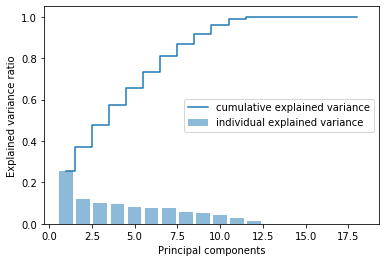

In [49]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [50]:
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
print(var_explained)

[0.2543149476750905, 0.11881800618940319, 0.10212877721748795, 0.0975202640242671, 0.08212985444237471, 0.076916636074634, 0.0762878843095616, 0.058084876119299515, 0.051084785928861565, 0.044304981910362945, 0.02636530313125163, 0.012043682977406005, -5.157518107199631e-17, -7.951892454368461e-17, -1.1935399056179087e-16, -1.3854115036104884e-16, -1.9201434537223437e-16, -2.4972500517699384e-16]


In [52]:
# PC1 captures highest information.
# To get more than 95% variation, lets consider 10 PCs

In [53]:
# 7.Transform the data using PCA (select optimum number of PCs). 

In [54]:
# Reducing the dimensions of the data set.
pca = PCA(n_components= 10).fit(X_train_Sc)
X_train_pca = pca.transform(X_train_Sc)

In [55]:

X_train_pca.shape


(200, 10)

In [56]:
print(pca.explained_variance_ratio_)

[0.25431495 0.11881801 0.10212878 0.09752026 0.08212985 0.07691664
 0.07628788 0.05808488 0.05108479 0.04430498]


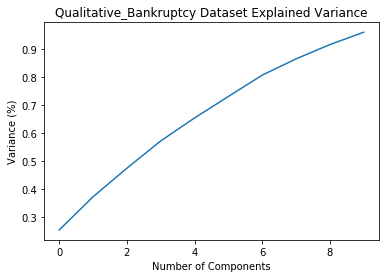

In [57]:
# Projecting the variance w.r.t the Principle Components

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Qualitative_Bankruptcy Dataset Explained Variance')
plt.show()


In [58]:
# 8. Apply KMeans algorithm on the above transformed data. 

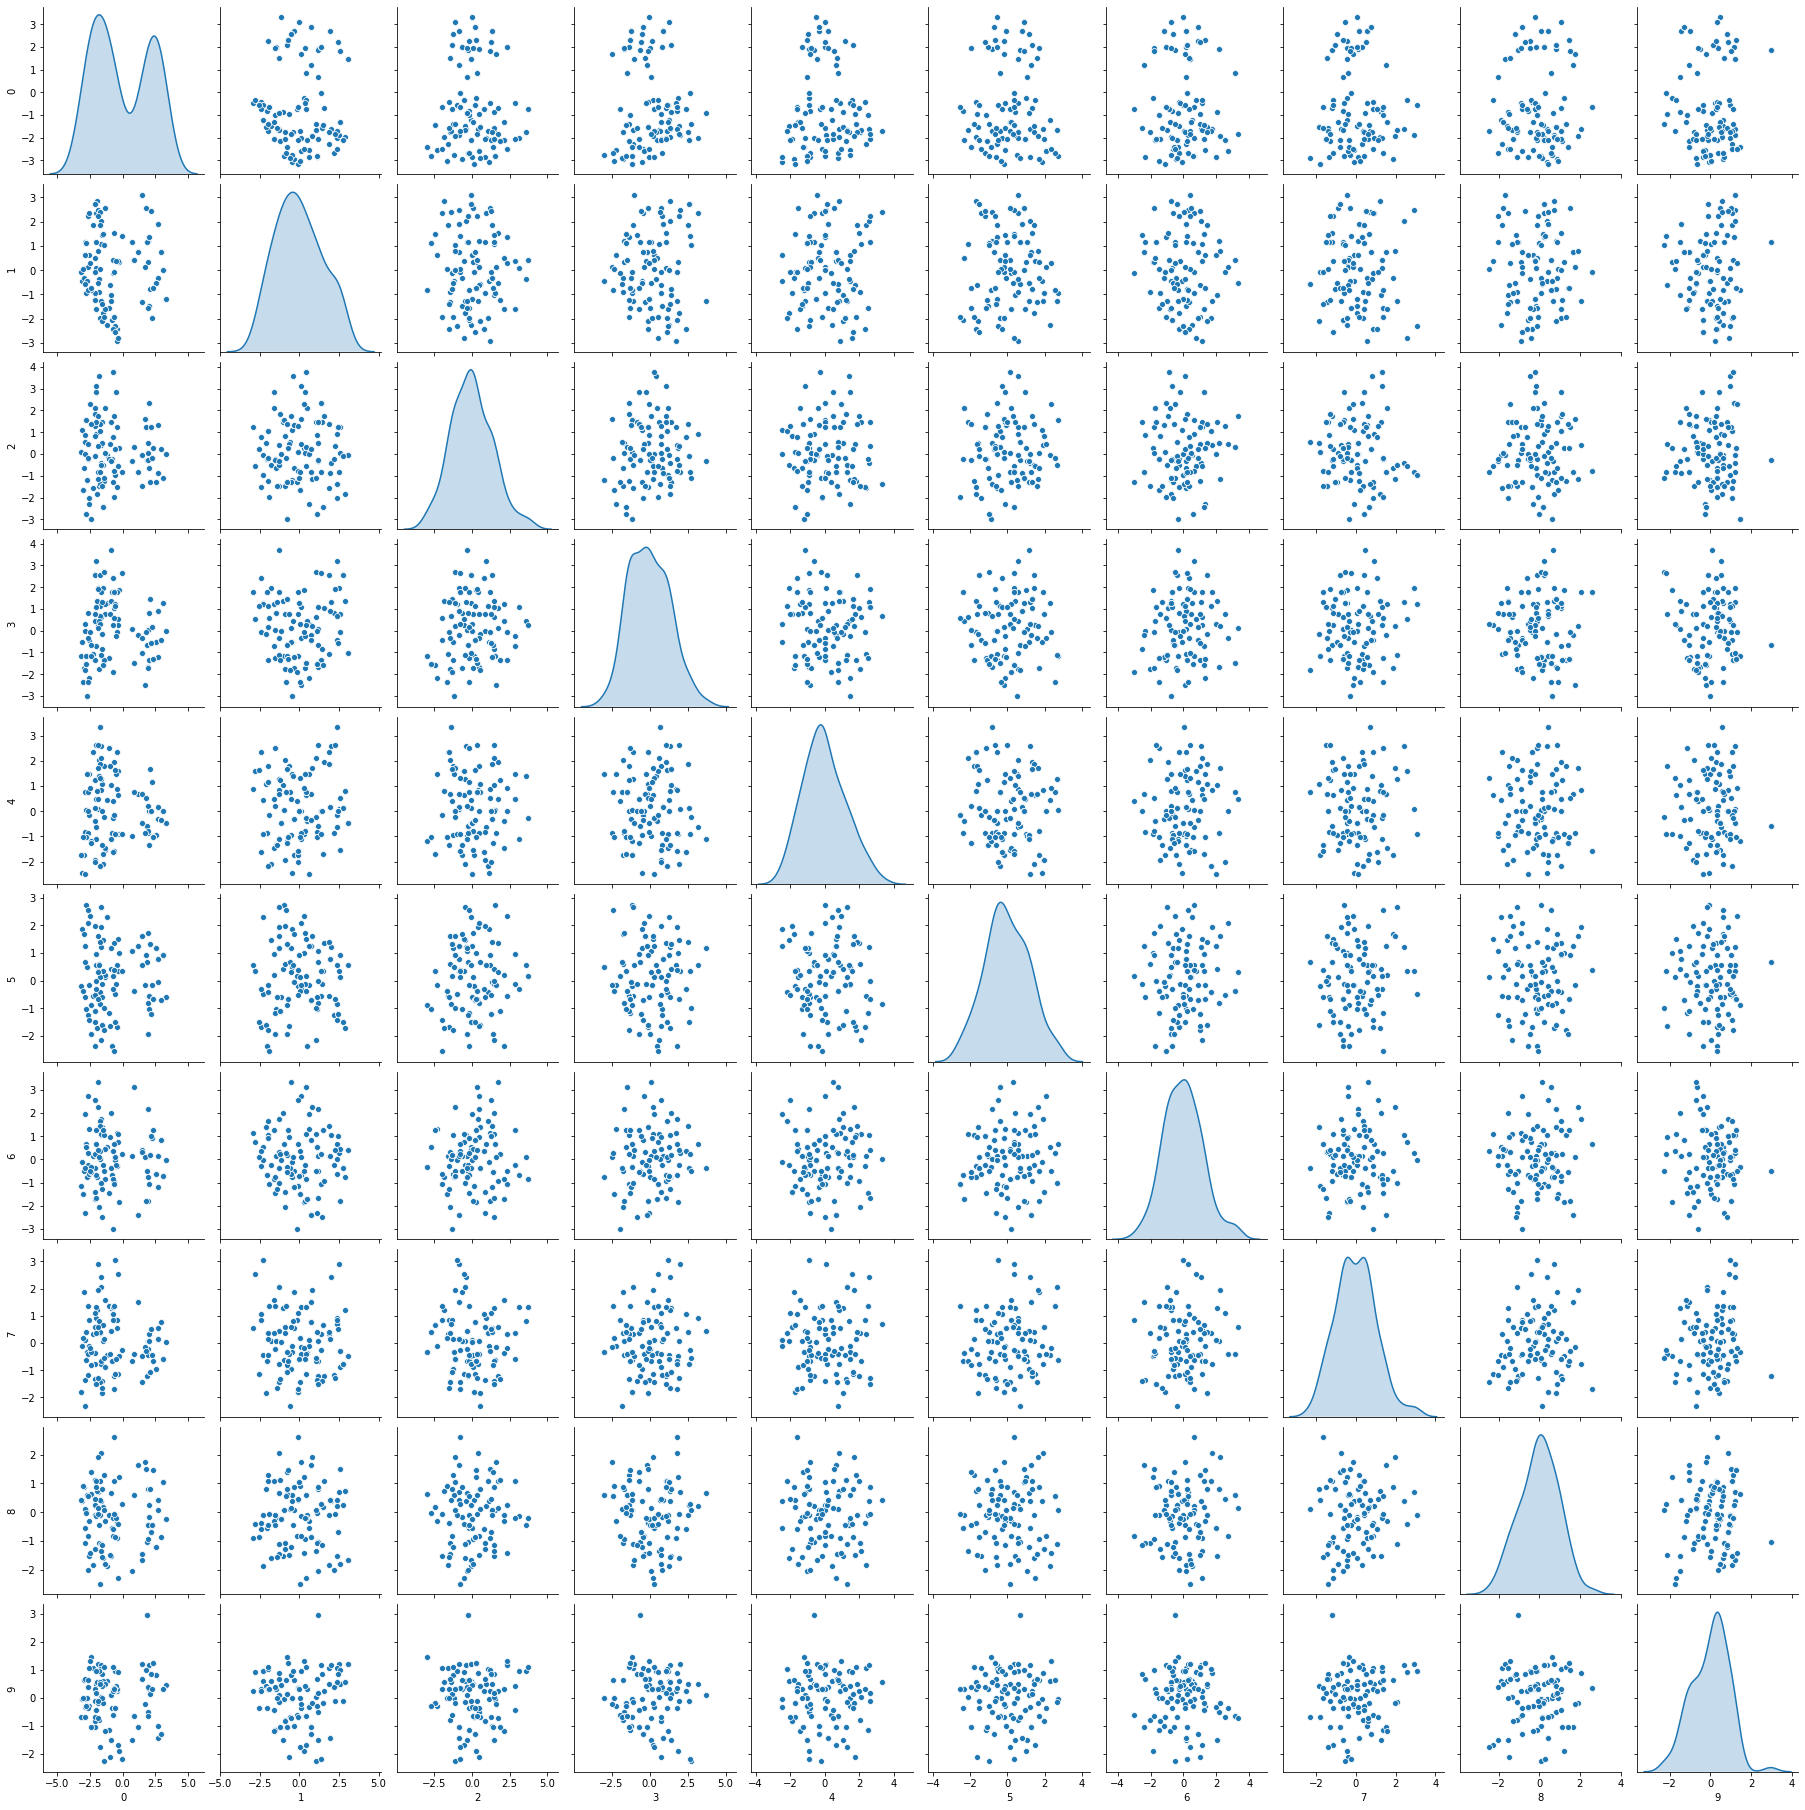

In [59]:
X_train_pca = pd.DataFrame(X_train_pca)

#Lets visualize the data
sns.pairplot(X_train_pca,diag_kind = 'kde')

In [60]:
# It is concluded that from the X-axis maximum 2 heaps are visible in any of the feature and from the Y-axis,
# maximum 2 clusters are visible .We can consider looking from 2 to 4 clusters.
# The scatterplots between the eigen vector tells us no significant relationship among them.

In [61]:
# Applying KMeans on PCA dimensions.

In [62]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_train_pca)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3461.727650
1,2,2647.234827
2,3,2354.370351
3,4,2184.391843
4,5,2026.653344
5,6,1862.620193
6,7,1739.753924
7,8,1676.938466
8,9,1574.233430


In [63]:
# Plotting the Elbow Plot

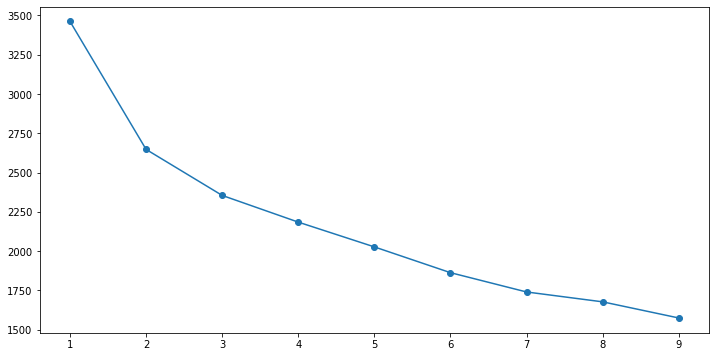

In [64]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [65]:
# 9. Select optimal number of clusters and form clusters out of the train data. 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

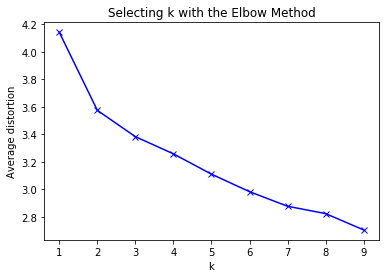

In [66]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_train_pca)
    prediction=model.predict(X_train_pca)
    meanDistortions.append(sum(np.min(cdist(X_train_pca, model.cluster_centers_, 'euclidean'), axis=1)) / X_train_pca.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [67]:
# There is bent at K=2 which tells us that this is the optimal number of clusters probably the dataset has.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.22618816261724864


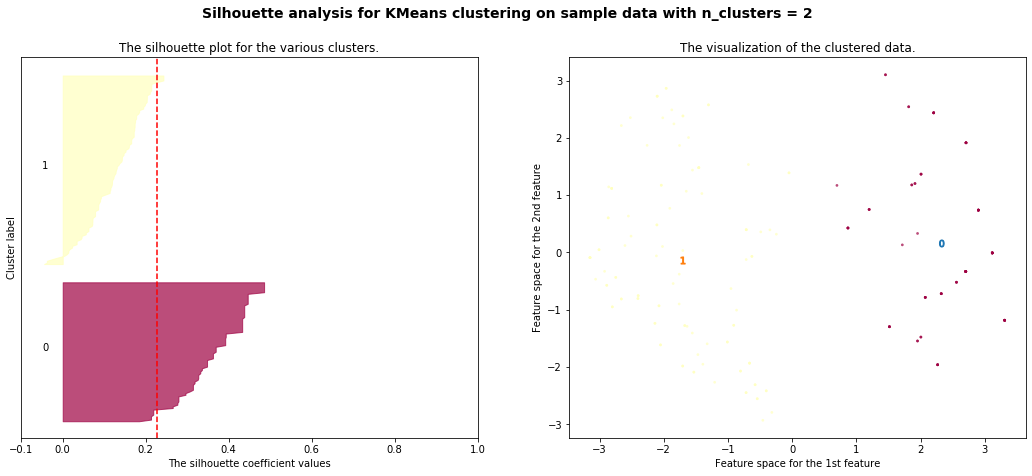

For n_clusters = 3 The average silhouette_score is : 0.23531655472350163


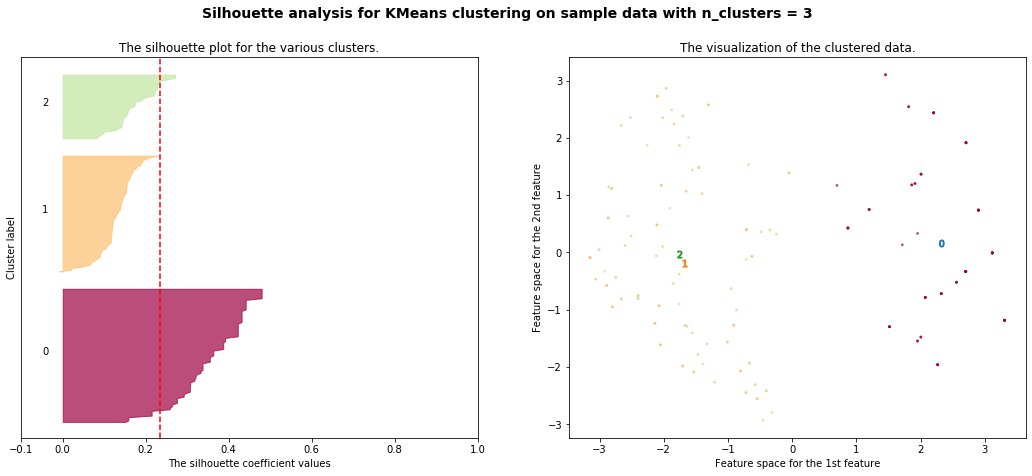

For n_clusters = 4 The average silhouette_score is : 0.2245171963933516


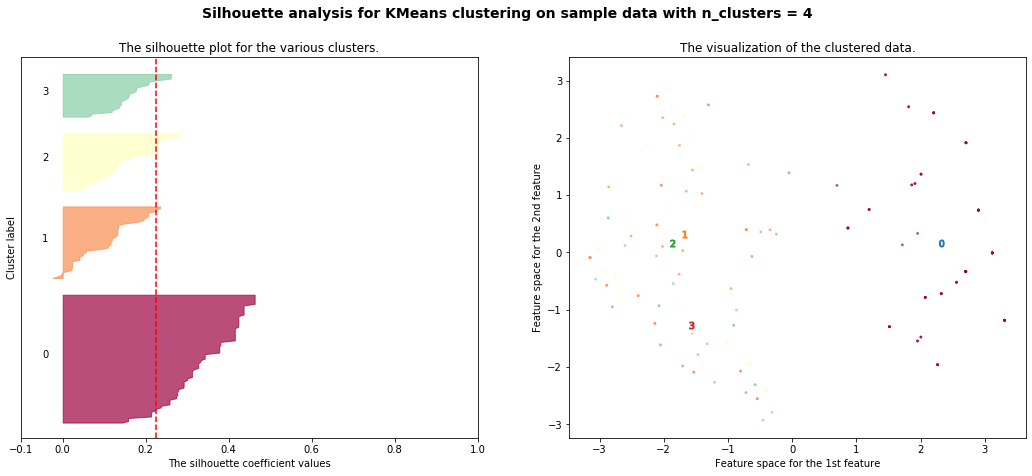

For n_clusters = 5 The average silhouette_score is : 0.2239141951506033


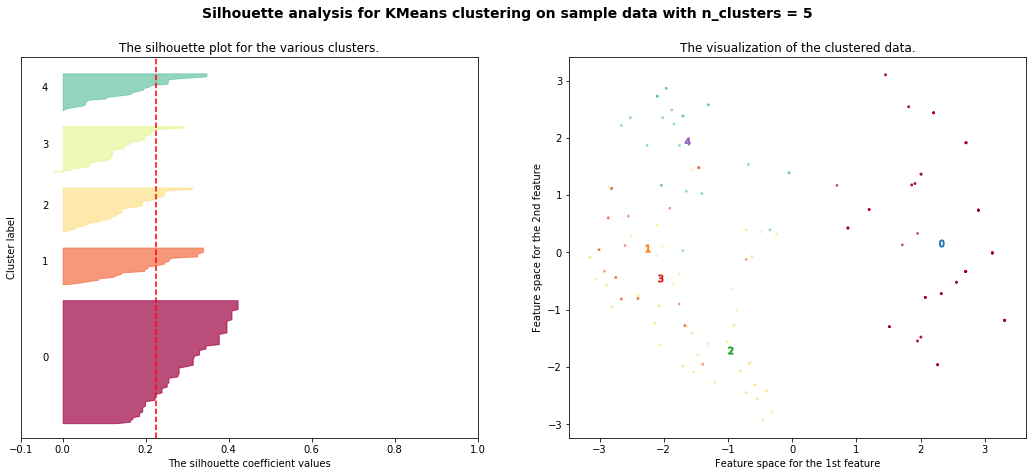

For n_clusters = 6 The average silhouette_score is : 0.22901071968434117


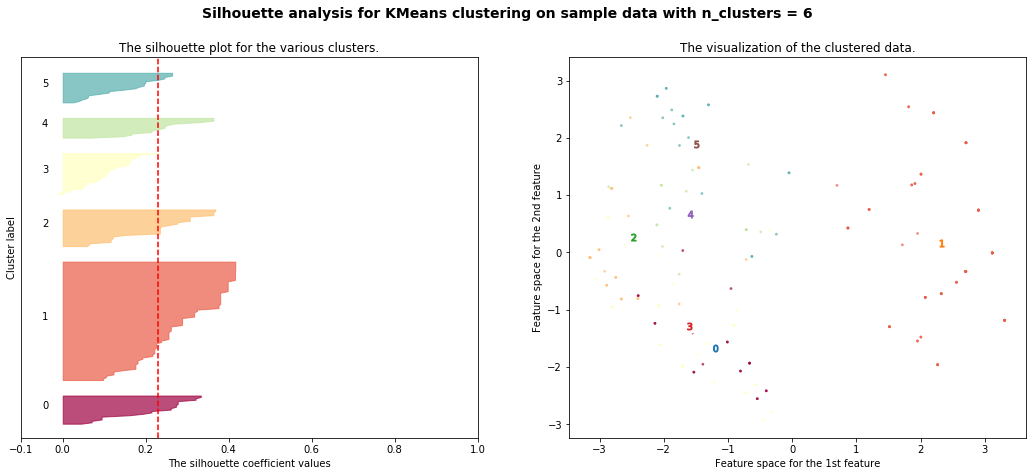

In [68]:
from __future__ import print_function
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X= X_train_pca
y= y_train


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [69]:
# Forming the clusters out of the train data.

# K = 2
model_Kmean=KMeans(n_clusters=2, n_init = 15, random_state=7)
model_Kmean.fit(X_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [70]:
# 10. Create a new column in the train data and populate it with the cluster labels. 

In [71]:
prediction_train = model_Kmean.predict(X_train_pca)

In [72]:
prediction_train.shape

(200,)

In [73]:
X_train_pca_copy = X_train_pca.copy()

In [74]:
X_train_pca_copy['GROUP'] = prediction_train

In [75]:
X_train_pca_copy.head(5)

,0,1,2,3,4,5,6,7,8,9,GROUP
0,-2.259133,1.869471,-1.559730,-1.063595,2.363942,-0.557740,0.142560,0.326950,-1.826508,1.069904,0
1,2.899599,0.738246,0.215731,-0.406589,-0.335260,-0.698811,0.855743,0.773592,-0.863242,-1.282511,1
2,2.707202,1.914105,-0.889120,0.882001,0.163315,0.786031,0.146812,0.151955,0.414900,-1.437407,1
3,1.198845,0.749432,-0.847118,-0.191520,0.680284,1.257440,-2.383703,1.510507,1.635330,-1.048722,1
4,-0.664169,-1.932660,-1.979057,0.582428,-0.168221,-2.546002,-1.052472,1.353869,-0.076054,0.315279,0


In [76]:
# 11. Transform the test data using the same PCA object that was fit on the train data. 

In [77]:
# Standardization of the independent features of the X_test.
X_test_Sc = sc.transform(X_test)

In [78]:
# Reducing the dimensions of the test data set
X_test_pca = pca.transform(X_test_Sc)
X_test_pca.shape

(50, 10)

In [79]:
# 12. Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 

In [80]:
#K=2
model_Kmean.fit(X_test_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [81]:
prediction_test = model_Kmean.predict(X_test_pca)

In [82]:
prediction_test

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0])

In [83]:
X_test_pca_copy = X_test_pca.copy()

In [84]:
X_test_pca_copy = pd.DataFrame(X_test_pca_copy)
X_test_pca_copy['Group'] = prediction_test
X_test_pca_copy.head(5)

,0,1,2,3,4,5,6,7,8,9,Group
0,-2.102289,2.726764,-0.079653,2.563781,0.109234,-1.503781,-0.372731,-0.781020,0.244448,-0.119945,0
1,-2.857072,1.143955,0.849226,-0.010071,-0.838624,-0.584207,-2.324292,-1.371170,-1.089817,0.683511,0
2,-1.303400,2.575717,0.039573,0.765816,-1.524531,0.122202,0.462205,-0.886134,-1.806158,0.480802,0
3,2.006797,1.366529,2.322667,-1.359299,0.020573,-0.563493,-1.073968,0.316190,0.235228,1.151019,1
4,-0.456809,-2.930170,1.220382,1.766398,0.889993,0.551125,1.125522,0.555578,-0.901194,0.244968,0


In [85]:
# 13. Apply SVC model on train dataset and predict target for test dataset. 

In [86]:
#clf = svm.SVC()
clf = svm.SVC(gamma=0.025, C=3)  
#clf = svm.SVC(gamma=0.001, C=5)

In [87]:
clf.fit(X_train_pca,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
y_pred = clf.predict(X_test_pca)

In [89]:
X_test_pca.shape

(50, 10)

In [90]:
# 14. Check accuracy and confusion matrix.

In [91]:
clf.score(X_train_pca,y_train)

1.0

In [92]:
# We got 100% accuracy in the Training data set.

In [93]:
clf.score(X_test_pca,y_test)

0.98

In [94]:
# We got 98% accuracy in the Test data set.

In [95]:
pd.crosstab(y_test,y_pred)

col_0,B,NB
Class,,
B,22,1
NB,0,27


In [96]:
print(confusion_matrix(y_test, y_pred))

[[22  1]
 [ 0 27]]


In [97]:
y_test.value_counts()

NB    27
B     23
Name: Class, dtype: int64

In [98]:
from sklearn.metrics import classification_report
target_names = ['B', 'NB' ]

In [99]:
print(classification_report(y_test, y_pred, target_names= target_names))

              precision    recall  f1-score   support

           B       1.00      0.96      0.98        23
          NB       0.96      1.00      0.98        27

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
# Class B:

# Precision : out of 22 points identified as positive by the model are actually positive i.e 'B'. 100%

# Recall : out of 23 points model correctly predicted 22 points. 96%